In [1]:
#download wfdb and spectrum
%%capture
!pip install wfdb
!pip install spectrum

In [2]:
#download dataset of chf database
%%capture
!wget -r -N -c -np https://physionet.org/files/chfdb/1.0.0/

In [3]:
#importing all liberaris
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from spectrum import *
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [4]:
#function to return all accuracy , balanced accuracy , precision and recall
def report_acc_cv(clf, X, y, model_name, cv=10):    
    metrics = cross_validate(clf, X, y, cv=cv, scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'])
    
    fit_time = metrics['fit_time']
    score_time = metrics['score_time']
    acc = metrics['test_accuracy']
    accb = metrics['test_balanced_accuracy']
    f1 = metrics['test_f1']
    p = metrics['test_precision']
    r = metrics['test_recall']
    
    print("Metrics for " + model_name)
    print("\n fit_time is: %.2f s +- %.2f s" %(np.mean(fit_time),np.std(fit_time)))
    print(" score_time is: %.2f s +- %.2f s\n" %(np.mean(score_time),np.std(score_time)))
    print(" accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))
    print(" balanced accuracy is: %.2f%% +- %.2f%%" %(np.mean(accb)*100,np.std(accb)*100))
    print(" f1-score is: %.2f%% +- %.2f%%" %(np.mean(f1)*100,np.std(f1)*100))
    print(" precision is: %.2f%% +- %.2f%%" %(np.mean(p)*100,np.std(p)*100))
    print(" recall is: %.2f%% +- %.2f%%" %(np.mean(r)*100,np.std(r)*100))

    return metrics

In [5]:
#download all content in chf dataset and select all features for return them to csv file
folderPath = "/content/physionet.org/files/chfdb/1.0.0"
file_names = ["chf01", "chf02", "chf03", "chf04", "chf05", "chf06", "chf07", "chf08",
              "chf09", "chf10", "chf11", "chf12", "chf13", "chf14", "chf15"]
n_features = 32
#select label for return them to csv file
csv_header = ["f"+str(i) for i in range(n_features+1)] + ["label"]
csv_header = ",".join(csv_header)
data = []
#append all csv files in one file collect all features with lables
#range signals by read samples 
for i in range(15):
    label = 1
    print("Process sample " + file_names[i])
    record = wfdb.rdsamp(os.path.join(folderPath, file_names[i]))
    signal1 = record[0][:, 0]
    for j in range(0, 100 * 1000, 1000):
        AR, rho, ref = arburg(signal1[j:j+1000], n_features)
        features = [k.real for k in AR]
        features.append(rho)
        features.append(label)
        data.append(features)
#save chf database in one csv file
np.savetxt("chf2_final.csv", data, delimiter=",", header=csv_header, comments="")

Process sample chf01
Process sample chf02
Process sample chf03
Process sample chf04
Process sample chf05
Process sample chf06
Process sample chf07
Process sample chf08
Process sample chf09
Process sample chf10
Process sample chf11
Process sample chf12
Process sample chf13
Process sample chf14
Process sample chf15


In [6]:
#install matplotlib virgin 3.1.3 to display signals
%%capture
!pip install matplotlib==3.1.3

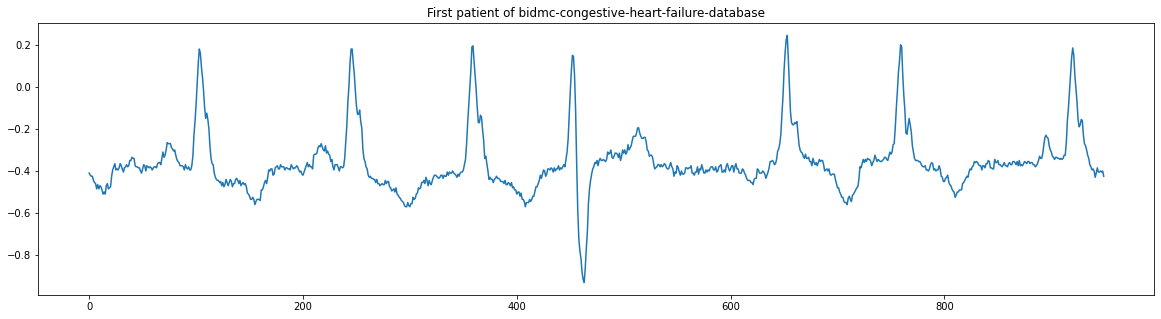

In [7]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/chfdb/1.0.0/chf06")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[50:1000])
plt.title("First patient of bidmc-congestive-heart-failure-database")
plt.show()

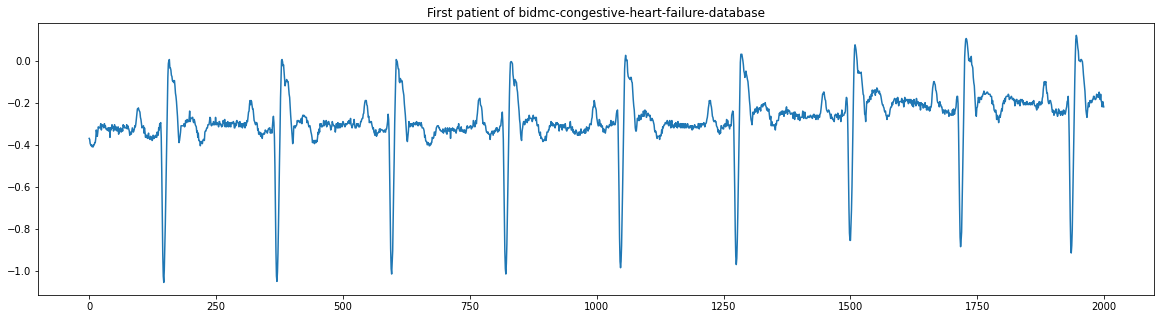

In [8]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/chfdb/1.0.0/chf08")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[:2000])
plt.title("First patient of bidmc-congestive-heart-failure-database")
plt.show()

In [9]:
#The beginnings of the disease dataset called -- [ Physikalisch-Technische Bundesanstalt (PTB) ]
%%capture
!wget -r -N -c -np https://physionet.org/files/ptbdb/1.0.0/

In [10]:
#download all content in PTB dataset and select all features for return them to csv file
folderPath ="/content/physionet.org/files/ptbdb/1.0.0/patient087" 
file_names = ["s0321lre", "s0326lre", "s0330lre"]
n_features = 32

csv_header = ["f"+str(i) for i in range(n_features+1)] + ["label"]
csv_header = ",".join(csv_header)
data = []
#select range and lable for comparing with normal and CHF signals 
for i in range(3):
    label = 1
    print("Process sample " + file_names[i])
    record = wfdb.rdsamp(os.path.join(folderPath, file_names[i]))
    signal1 = record[0][:, 0]
    for j in range(0, len(signal1), 1000):
        AR, rho, ref = arburg(signal1[j:j+1000], n_features)
        features = [k.real for k in AR]
        features.append(rho)
        features.append(label)
        data.append(features)
#save all file to one csv file
np.savetxt("chf_final.csv", data, delimiter=",", header=csv_header, comments="")

Process sample s0321lre
Process sample s0326lre
Process sample s0330lre


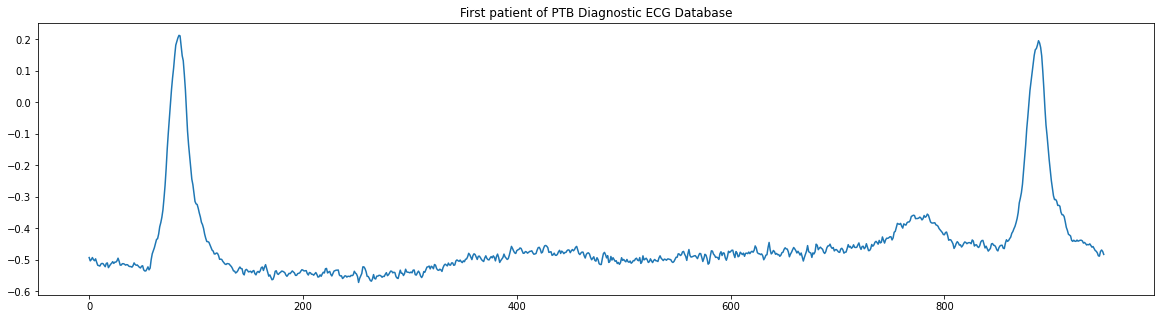

In [11]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/ptbdb/1.0.0/patient087/s0321lre")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[50:1000])
plt.title("First patient of PTB Diagnostic ECG Database")
plt.show()

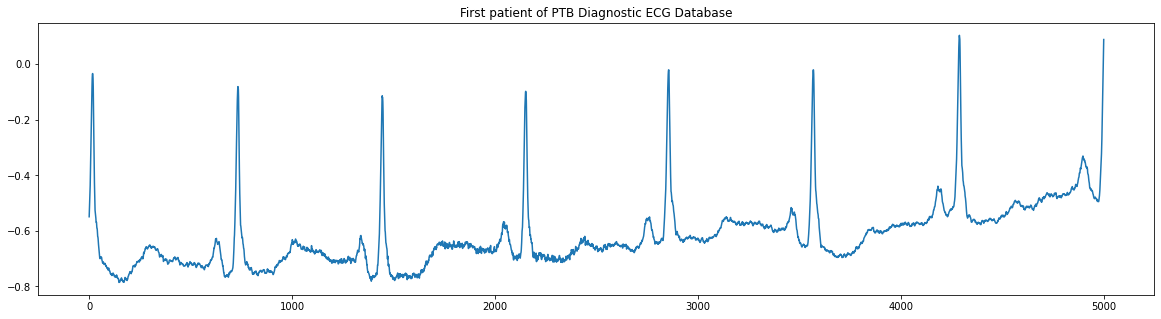

In [12]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/ptbdb/1.0.0/patient087/s0326lre")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[:5000])
plt.title("First patient of PTB Diagnostic ECG Database")
plt.show()

In [13]:
#download MIT dataset for Diveing into the disease called -- [ MIT-BIH Normal ]
%%capture
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

In [14]:
#download all content in PTB dataset and select all features for return them to csv file
#select range and lable for comparing with normal and CHF signals 
folderPath = "/content/physionet.org/files/mitdb/1.0.0"
n_features = 32

csv_header = ["f"+str(i) for i in range(n_features + 1)] + ["label"]
csv_header = ",".join(csv_header)
data = []

for i in range(9):
    label = 0
    print("Process sample " + str(100 + i))

    # Using WFDB for reading dat final and get signal datas 
    record = wfdb.rdsamp(os.path.join(folderPath, str(100 + i)))
    signal1 = record[0][:, 0]
    signal2 = record[0][:, 1]
    for j in range(0, 100 * 1000, 1000):
        
        AR, rho, ref = arburg(signal1[j:j+1000], n_features)
        features = [k.real for k in AR]
        features.append(rho)
        features.append(label)
        data.append(features)
#save all normal signals to one file csv
np.savetxt("normal_final.csv", data, delimiter=",", header=csv_header, comments="")

Process sample 100
Process sample 101
Process sample 102
Process sample 103
Process sample 104
Process sample 105
Process sample 106
Process sample 107
Process sample 108


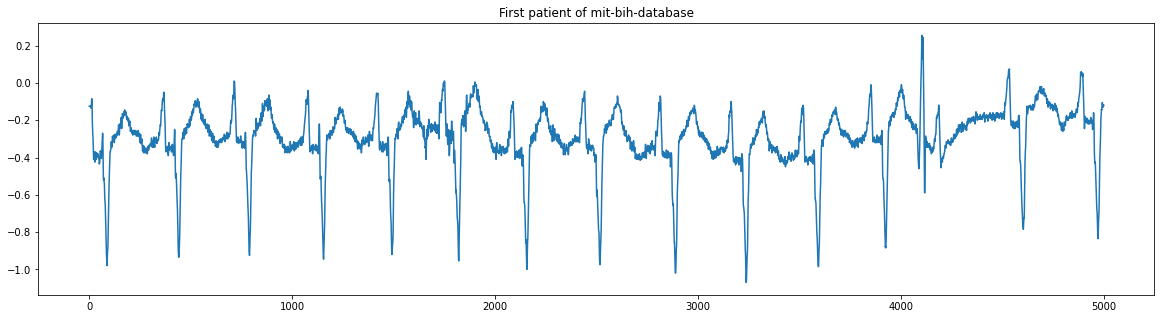

In [15]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/mitdb/1.0.0/108")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[:5000])
plt.title("First patient of mit-bih-database")
plt.show()

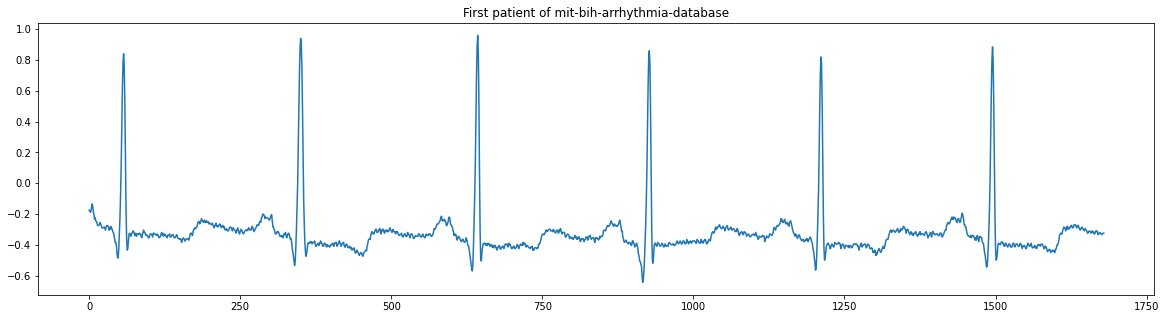

In [16]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/mitdb/1.0.0/100")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[20:1700])
plt.title("First patient of mit-bih-arrhythmia-database")
plt.show()

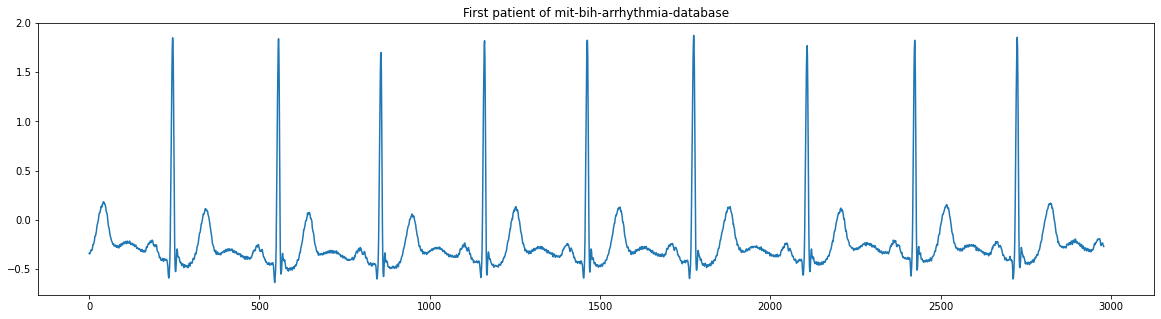

In [17]:
#read signals with samples of one patient
record = wfdb.rdsamp("/content/physionet.org/files/mitdb/1.0.0/103")
signal = record[0][:, 0]
plt.figure(figsize=(20,5))
plt.plot(signal[20:3000])
plt.title("First patient of mit-bih-arrhythmia-database")
plt.show()

In [18]:
#read all csv files for 3 datasets and add concatinate in one file 
chf = pd.read_csv('/content/chf_final.csv')
chf2 = pd.read_csv('/content/chf2_final.csv')
normal = pd.read_csv('/content/normal_final.csv')

case1_data = pd.concat([chf2, normal]).sample(frac=1, random_state=42).reset_index(drop=True)
case2_data = pd.concat([chf, normal]).sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
case1_data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f24,f25,f26,f27,f28,f29,f30,f31,f32,label
0,-1.927155,0.864364,0.221220,-0.160063,-0.165576,0.201468,0.213512,-0.212117,-0.084498,0.069968,...,0.274082,-0.144905,0.064275,-0.105614,0.064229,-0.039093,0.102833,-0.066850,0.000302,0.0
1,-2.063554,1.337990,-0.123915,-0.373354,0.239781,0.072032,-0.048597,0.041915,-0.135524,0.140135,...,0.015048,-0.079901,0.151554,-0.024469,-0.195504,0.074549,0.142882,-0.092725,0.000440,0.0
2,-2.156347,1.643981,-0.573553,0.086985,0.027208,0.115729,-0.130396,0.119553,-0.163605,0.026528,...,0.109236,-0.169066,0.195373,-0.159368,0.086347,-0.061452,0.066768,-0.034059,0.004973,1.0
3,-2.120353,1.709472,-0.401904,-0.467594,0.345391,0.059790,-0.191985,0.061708,0.050731,-0.085185,...,-0.082376,0.137784,-0.156994,0.145437,-0.064888,-0.021217,0.093475,-0.081071,0.000526,0.0
4,-1.812824,0.645323,0.259712,-0.041975,-0.194459,0.108682,0.236343,-0.020856,-0.225552,0.036210,...,0.100334,-0.024952,0.016764,-0.028794,-0.094249,0.009640,0.186449,-0.111543,0.000239,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-2.177265,1.586058,-0.107540,-0.499291,0.166815,0.137656,-0.081187,0.014472,-0.067596,0.059110,...,0.125857,-0.055806,-0.027654,0.127735,-0.176334,0.068897,0.054359,-0.048839,0.000508,0.0
2396,-2.158511,1.276956,-0.002963,-0.125402,-0.006529,0.101551,0.105469,-0.196656,-0.148007,0.158189,...,-0.031920,0.182373,-0.206892,0.083819,0.045885,0.012272,-0.085065,0.038059,0.002233,1.0
2397,-1.355212,0.161882,0.185388,0.026835,-0.018604,-0.050578,-0.035967,0.187270,0.008494,-0.133789,...,0.089200,-0.046205,-0.020087,-0.106065,0.101591,0.034810,-0.065902,0.002266,0.000395,1.0
2398,-1.540226,0.281119,0.395491,0.084065,-0.181004,-0.052878,0.039959,0.092852,-0.055828,-0.042271,...,0.052468,-0.096297,-0.036612,0.088093,-0.023710,-0.028251,0.082745,-0.057346,0.000504,1.0


In [20]:
case1_data.isna().sum()

f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
f28      0
f29      0
f30      0
f31      0
f32      0
label    0
dtype: int64

In [21]:
input = case1_data.drop(['label'],axis=1)
output = case1_data['label']

In [22]:
input

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32
0,-1.927155,0.864364,0.221220,-0.160063,-0.165576,0.201468,0.213512,-0.212117,-0.084498,0.069968,...,-0.174754,0.274082,-0.144905,0.064275,-0.105614,0.064229,-0.039093,0.102833,-0.066850,0.000302
1,-2.063554,1.337990,-0.123915,-0.373354,0.239781,0.072032,-0.048597,0.041915,-0.135524,0.140135,...,0.062038,0.015048,-0.079901,0.151554,-0.024469,-0.195504,0.074549,0.142882,-0.092725,0.000440
2,-2.156347,1.643981,-0.573553,0.086985,0.027208,0.115729,-0.130396,0.119553,-0.163605,0.026528,...,-0.113383,0.109236,-0.169066,0.195373,-0.159368,0.086347,-0.061452,0.066768,-0.034059,0.004973
3,-2.120353,1.709472,-0.401904,-0.467594,0.345391,0.059790,-0.191985,0.061708,0.050731,-0.085185,...,0.004331,-0.082376,0.137784,-0.156994,0.145437,-0.064888,-0.021217,0.093475,-0.081071,0.000526
4,-1.812824,0.645323,0.259712,-0.041975,-0.194459,0.108682,0.236343,-0.020856,-0.225552,0.036210,...,-0.060579,0.100334,-0.024952,0.016764,-0.028794,-0.094249,0.009640,0.186449,-0.111543,0.000239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-2.177265,1.586058,-0.107540,-0.499291,0.166815,0.137656,-0.081187,0.014472,-0.067596,0.059110,...,-0.146079,0.125857,-0.055806,-0.027654,0.127735,-0.176334,0.068897,0.054359,-0.048839,0.000508
2396,-2.158511,1.276956,-0.002963,-0.125402,-0.006529,0.101551,0.105469,-0.196656,-0.148007,0.158189,...,-0.073518,-0.031920,0.182373,-0.206892,0.083819,0.045885,0.012272,-0.085065,0.038059,0.002233
2397,-1.355212,0.161882,0.185388,0.026835,-0.018604,-0.050578,-0.035967,0.187270,0.008494,-0.133789,...,0.024320,0.089200,-0.046205,-0.020087,-0.106065,0.101591,0.034810,-0.065902,0.002266,0.000395
2398,-1.540226,0.281119,0.395491,0.084065,-0.181004,-0.052878,0.039959,0.092852,-0.055828,-0.042271,...,-0.004164,0.052468,-0.096297,-0.036612,0.088093,-0.023710,-0.028251,0.082745,-0.057346,0.000504


In [23]:
output

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2395    0.0
2396    1.0
2397    1.0
2398    1.0
2399    1.0
Name: label, Length: 2400, dtype: float64

In [24]:
#splitting data for fit
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
# splitting 35% for testing
x_train , x, y_train , y = train_test_split(input , output , test_size = 0.35 , random_state = 42)
# splitting the other part to trainset and validation set
x_test , x_val , y_test , y_val = train_test_split(x , y , test_size = 0.5 , random_state = 42)

In [26]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1560, 33)
(420, 33)
(420, 33)


In [27]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(x_train, y_train) 

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [28]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm 

array([[146,   2],
       [ 11, 261]])

In [30]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=True)
model = LogisticRegression(solver= 'liblinear')
model.fit(x_train,y_train)
pred_values = model.predict(x_test)
acc = accuracy_score(pred_values , y_test) 
print('accuracy of each fold - {}'.format(acc))

accuracy of each fold - 0.9452380952380952


In [31]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
def K_fold(model_name , nsplits):

    kf = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state=1)
    cnt = 1
    for train_index, test_index in kf.split(x, y):
        # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
        cnt+=1
        score = cross_val_score(model_name, x, y, cv= kf, scoring="accuracy")

        print(f'Scores for each fold are: {score}')
        print(f'Average score: {"{:.3f}".format(score.mean()*100)}')

In [32]:
from sklearn.ensemble import AdaBoostClassifier
#adaboost _ Tree
DT_model = tree.DecisionTreeClassifier(random_state=0 , max_depth=5)
ada = AdaBoostClassifier(base_estimator=DT_model,n_estimators=100, random_state=0)
ada.fit(x_train, y_train)

ada_pred_test = ada.predict(x_test)

ada_pred_train = ada.predict(x_train)

#Score/Accuracy
ada_acc_train=accuracy_score(y_train, ada_pred_train)*100
ada_acc_test=accuracy_score(y_test, ada_pred_test)*100
print(ada_acc_train)
print(ada_acc_test)

100.0
100.0


In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
bagging_classifier = BaggingClassifier()

bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)
bagtree_acc_train = bagging_classifier.score(x_train,y_train)*100
bagtree_acc_test = bagging_classifier.score(x_test,y_test)*100
print('Bagging',bagtree_acc_train)
print('Bagging',bagtree_acc_test)

Bagging 99.8076923076923
Bagging 98.80952380952381


In [34]:
y_pred = bagging_classifier.predict(x_test)

## Case determined  (1300 + 1500 = 2800 samples)
### BIDMC congestive heart failure + MIT BIH Arrhythmia databases
### Metrics result determined in each section 

### Decision Tree(DT)

In [35]:
DTClf = DecisionTreeClassifier(max_depth=15, max_leaf_nodes=8)

DT_metrics1 = report_acc_cv(DTClf, case1_data.drop("label", axis=1), case1_data["label"], "Decision Tree", cv=10)

Metrics for Decision Tree

 fit_time is: 0.04 s +- 0.00 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 95.38% +- 1.04%
 balanced accuracy is: 94.50% +- 0.92%
 f1-score is: 96.36% +- 0.85%
 precision is: 94.78% +- 0.63%
 recall is: 98.00% +- 1.66%


In [36]:
model = DecisionTreeClassifier(random_state=2)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

In [37]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

print('Training accuracy =', accuracy_score(y_train, y_pred_train))
print('Validation accuracy =', accuracy_score(y_val, y_pred_val))
print('test accuracy =', accuracy_score(y_test, y_pred_test))

Training accuracy = 1.0
Validation accuracy = 0.9809523809523809
test accuracy = 0.9761904761904762


### K-Nearest Neighbor(KNN)

In [38]:
KNNClf = KNeighborsClassifier(n_neighbors=3)

KNN_metrics1 = report_acc_cv(KNNClf, case1_data.drop("label", axis=1), case1_data["label"], "KNN", cv=10)

Metrics for KNN

 fit_time is: 0.00 s +- 0.00 s
 score_time is: 0.03 s +- 0.00 s

 accuracy is: 96.33% +- 0.98%
 balanced accuracy is: 96.22% +- 1.00%
 f1-score is: 97.05% +- 0.80%
 precision is: 97.46% +- 0.95%
 recall is: 96.67% +- 1.33%


### Artificial Neural Network(ANN)

In [39]:
ANNClf = MLPClassifier(hidden_layer_sizes=(10,), activation="logistic", max_iter=2000)

ANN_metrics1 = report_acc_cv(ANNClf, case1_data.drop("label", axis=1), case1_data["label"], "ANN", cv=10)

Metrics for ANN

 fit_time is: 3.54 s +- 0.53 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 98.17% +- 0.46%
 balanced accuracy is: 98.09% +- 0.53%
 f1-score is: 98.53% +- 0.37%
 precision is: 98.68% +- 0.88%
 recall is: 98.40% +- 1.00%


### Support Vector Machine(SVM)

---



In [40]:
from scipy.spatial.distance import pdist, cdist
from scipy.spatial.distance import squareform

def PUK_kernel(X1,X2, sigma=1.0, omega=1.0):
    if X1 is X2 :
        kernel = squareform(pdist(X1, 'sqeuclidean'))
    else:
        kernel = cdist(X1, X2, 'sqeuclidean')

    kernel = (1 + (kernel * 4 * np.sqrt(2**(1.0/omega)-1)) / sigma**2) ** omega
    kernel = 1/kernel

    return kernel

SVMClf = SVC(kernel=PUK_kernel, gamma=1, C=1)

SVM_metrics1 = report_acc_cv(SVMClf, case1_data.drop("label", axis=1), case1_data["label"], "SVM", cv=10)

Metrics for SVM

 fit_time is: 0.16 s +- 0.02 s
 score_time is: 0.02 s +- 0.01 s

 accuracy is: 98.29% +- 0.57%
 balanced accuracy is: 98.37% +- 0.58%
 f1-score is: 98.62% +- 0.46%
 precision is: 99.19% +- 0.58%
 recall is: 98.07% +- 0.81%


### Random Forest (RF)

In [41]:
RFClf = RandomForestClassifier(n_estimators=20, max_features=6)

RF_metrics1 = report_acc_cv(RFClf, case1_data.drop("label", axis=1), case1_data["label"], "RF", cv=10)

Metrics for RF

 fit_time is: 0.22 s +- 0.01 s
 score_time is: 0.01 s +- 0.00 s

 accuracy is: 98.42% +- 0.96%
 balanced accuracy is: 98.33% +- 1.04%
 f1-score is: 98.73% +- 0.77%
 precision is: 98.80% +- 0.93%
 recall is: 98.67% +- 0.99%


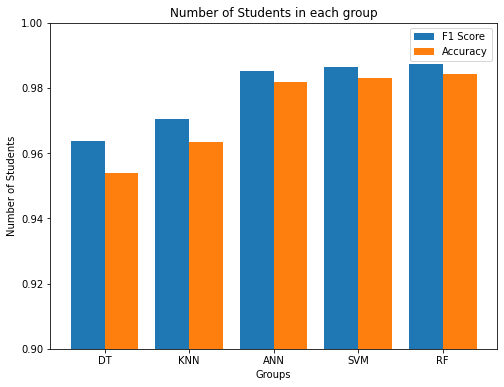

In [42]:
X = ['DT','KNN','ANN','SVM', 'RF']

f1 = [DT_metrics1['test_f1'], KNN_metrics1['test_f1'], ANN_metrics1['test_f1'],
       SVM_metrics1['test_f1'], RF_metrics1['test_f1']]
f1 = np.mean(f1, axis=1)

acc = [DT_metrics1['test_accuracy'], KNN_metrics1['test_accuracy'], ANN_metrics1['test_accuracy'],
      SVM_metrics1['test_accuracy'], RF_metrics1['test_accuracy']]
acc = np.mean(acc, axis=1)

X_axis = np.arange(len(X))
  
plt.figure(figsize=(8,6))
plt.bar(X_axis - 0.2, f1, 0.4, label = 'F1 Score')
plt.bar(X_axis + 0.2, acc, 0.4, label = 'Accuracy')


plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.ylim(0.9, 1)
plt.show()

In [59]:
#to convert all .ecg file into .npy for test
dir =("/content/physionet.org/files/ptbdb/1.0.0/patient015")
for i in os.listdir(dir):
    files = os.path.join(dir,i)
    split= os.path.splitext(files)
    if split[1]=='.dat':
       os.rename(files,split[0]+'.npy')

In [62]:
#to convert signals to .npy
dir =("/content/physionet.org/files/mitdb/1.0.0")
for i in os.listdir(dir):
    files = os.path.join(dir,i)
    split= os.path.splitext(files)
    if split[1]=='.dat':
       os.rename(files,split[0]+'.npy')

In [63]:
import numpy as np
arr = np.fromfile('/content/chf_final.csv', dtype=np.float64)
np.save('file2.npy', arr)

In [64]:
test = np.load('/content/file2.npy')
test = pd.DataFrame(test).T

In [65]:
test

,0,1,2,3,4,5,6,7,8,9,...,37687,37688,37689,37690,37691,37692,37693,37694,37695,37696
0,6.579428e-66,1.498058e+184,1.095471e-95,1.003947e-70,1.003941e-70,1.003942e-70,1.003944e-70,1.003945e-70,6.579463e-66,6.579427e-66,...,1.269316e-76,3.220542e-57,3.218683e-57,5.205572e-90,7.494017e-67,4.084488e-33,3.272342e+179,1.397370e-76,1.398043e-76,1.398043e-76


In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,...,162393,162394,162395,162396,162397,162398,162399,162400,162401,162402
0,6.579428e-66,1.498058e+184,1.095471e-95,1.003947e-70,1.003941e-70,1.003942e-70,1.003944e-70,1.003945e-70,6.579463e-66,6.579427e-66,...,1.576304e-52,8.609699e-67,1.519786e-47,3.453014e-86,2.318601e-52,3.857164e-57,7.980304e-72,1.398043e-76,1.398043e-76,1.316077e-259


In [67]:
import numpy as np
arr = np.fromfile('/content/physionet.org/files/chfdb/1.0.0/chf13.dat', dtype=np.float64)
np.save('chfdb01.npy', arr)

In [68]:
test = np.load('/content/chfdb01.npy')
test = pd.DataFrame(test).T
test

,0,1,2,3,4,5,6,7,8,9,...,6748750,6748751,6748752,6748753,6748754,6748755,6748756,6748757,6748758,6748759
0,-2.177733e+305,3.890691e+52,-9.310372e+139,-6.821221e+304,2.286730e-20,-2.731277e+101,-6.262964e+304,8.734722e-64,-7.684972e+115,-6.543700e+304,...,2.970125e-213,-1.861560e+53,-1.838976e+304,1.985453e-184,-2.248786e+77,-8.170248e+303,2.330683e-256,-4.797987e+173,9.613144e-238,-1.221767e-150


In [69]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(bagging_classifier)
 
# Load the pickled model
bagging_classifier = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
bagging_classifier.predict(x_test)

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0.

In [71]:
#Save Model¶
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9761904761904762
